# 写在最前面
本项目的笔记本文件只翻译与学习内容直接相关的知识，课程、打分相关的将忽略不计。为了在本地运行，源码也将进行众多修改。（不过一些显然的英文代码注释就不动了）

这是 “纯净版” 文件（即删除英文和注释，以及不适应本地运行的代码），原文请参考主目录下的文件。

# **CS224W - Colab 0**
Colab 0 主要作用是熟悉图挖掘和图神经网络的基本概念，虽然没啥真的作业题但强烈推荐你跑下~

这个 Colab 主要涉及两个库, [NetworkX](https://networkx.org/documentation/stable/) 和 [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/).

PyTorch Geometric 章节中，你也不需要现在就理解全部细节。图神经网络的概念和实现会在之后的课程和 Colabs 中详细介绍。


# NetworkX 教程
NetworkX 是最常用的，用于创建、操作和挖掘图的 Python 库之一。

这个教程的主要内容改编自 https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6


## Setup

In [1]:
# Import the NetworkX package
import networkx as nx

## 图
NetworkX 提供了几个类（class）以存储不同类别的图，比如有向图、无向图。也提供了创建多图（既有向又无向）的类。

具体请参考 [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).


In [2]:
# Create an undirected graph G
# 创建无向图 G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
# 创建有向图 H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
# 添加图级别的属性
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## 节点

可以很简单地给 NetworkX 添加节点 (及其属性)。


In [3]:
# Add one node with node level attributes
# 添加一个节点，以及其节点级属性
G.add_node(0, feature=0, label=0)

# Get attributes of the node 0
# 获取节点 0 的属性
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 0, 'label': 0}


In [4]:
# Add multiple nodes with attributes
# 添加多个节点，以及其节点级属性
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
])

# Loop through all the nodes
# Set data=True will return node attributes
# 遍历所有节点
# 设置 data=True 会返回节点属性
for node in G.nodes(data=True):
    print(node)

# Get number of nodes
# 获取节点数
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## 边
与节点类似，边（及其属性）也可以很简单地加入到 NetworkX 中。



In [5]:
# Add one edge with edge weight 0.5
# 添加一条权重 0.5 的边
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
# 获取边 (0,1) 的属性
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [6]:
# Add multiple edges with edge weights
# 添加多条带权重的边
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
# 遍历所有边
# 这里没有 data=True，所以只返回边（没有属性）
for edge in G.edges():
  print(edge)

# Get number of edges
# 获取边的数量
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## 可视化


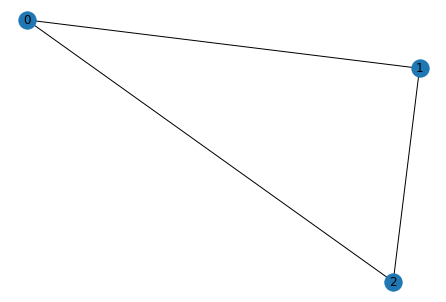

In [7]:
# Draw the graph
# 画图
nx.draw(G, with_labels = True)

## 节点度与邻居

In [8]:
node_id = 1

# Degree of node 1
# 节点 1 的度
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
# 节点 1 的邻居
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


## 其他方法

NetworkX 还有一堆研究图能用到的方法.

这里是一个获取节点 [PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank) 的例子 (PageRank 课上会讲哦).


{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

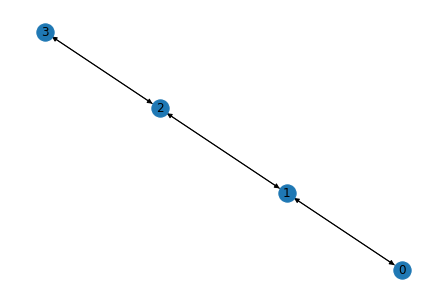

In [9]:
num_nodes = 4
# Create a new path like graph and change it to a directed graph
# 创建一个新的路径图，并改变它为一个有向图
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# Get the PageRank
# 获取 PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

## 文档

阅读 NetworkX [官方文档](https://networkx.org/documentation/stable/) 以探索更多函数吧！


# PyTorch Geometric Tutorial

PyTorch Geometric (PyG) 是一个 Pytorch 的拓展库，提供了各种开发图深度学习模型的计算原语（primitives），包括各种图神经网络层以及超多的标准数据集。

如果你暂时不知道 `GCNConv` 之类的是个啥也不要紧 -- 课上会讲到的 0v0 ~

这个教程改编自 https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing#scrollTo=ci-LpZWhRJoI by [Matthias Fey](https://rusty1s.github.io/#/)



In [10]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 1.7.1


## Setup

在 Colab 上装 PyG 有点难。运行下面的代码试试 -- 以防碰到问题，请查阅 [PyG 的安装页面](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html).

*作者注：下面的代码也是可以在 Jupyter 等文件上直接跑的，但请注意本地 Pytorch、以及 cuda 的版本*



In [11]:
# Install torch geometric
!export NPY_MKL_FORCE_INTEL=1 # Modified to adjust to local envs
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.7.1+cu101.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.7.1+cu101.html
!pip install -q torch-geometric

## 可视化

## Visualization

In [12]:
# Helper function for visualization.
# 可视化用到的函数.

%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
# NX 图或 PyTorch 张量的可视化函数
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

## Introduction
近年来，基于图的深度学习成为深度学习领域最热门的研究领域之一。**图神经网络 (GNNs)** 旨在将经典的深度学习概念推广到（与图像或文本相比）不规则的结构化数据，并使神经网络能够对对象及其关系进行推理。

本教程将通过 **[PyTorch Geometric (PyG)](https://github.com/rusty1s/pytorch_geometric)** 介绍一些图深度学习以及图神经网络的基本概念

PyTorch Geometric 是知名的深度学习平台——[PyTorch](https://pytorch.org/)的扩展库, 其由各种方法和工具组成，以简化图神经网络的实现.

根据 [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), 让我们通过观察一个简单的图形结构示例，也就是知名的 [**Zachary 的空手道俱乐部网络**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)，深入了解 gnn 的世界！ 这张图描述了一个由 34 名空手道俱乐部成员组成的社交网络，并记录了俱乐部外成员之间的联系。在这里，我们感兴趣的是检测由成员的交互产生的社区。


## 数据集

PyTorch Geometric 提供了 [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) 以轻松使用数据集:


In [13]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


在初始化 [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) 数据集后, 我们首先可以检查它的一些属性.

比如，我们可以看到，这个数据集中只有**一张图**，这个数据集中的每个节点都被分配一个 **34 维的特征向量**（用以唯一描述空手道俱乐部的成员）

此外，图中包含 **4 个类**，它们表示每个节点所属的社区。

现在让我们更详细地看看这个图:


## Data
PyTorch Geometric 的每个图都被表示为一个单独的 [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data) 对象，它包含了描述其图表示的所有信息。

我们可以在任何时间通过  `print(data)` 打印数据，以接收关于其属性及其形状的简短摘要:
```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```
我们可以看到， `data` 对象的 4 个属性:

1. `edge_index` 是表示**图连通性**信息的属性，比如由源节点和目标节点索引的，每条边组成的元组.

2. **节点特征** `x` (34个节点，每个节点都被分配了 34 维的向量)

3.  **节点标签** `y` (每个节点都被分配了一个特定的类别).

4.  还有一个附加属性叫做 `train_mask`, 描述了（训练时）我们已经知道哪些节点的社区分配.

总的来说，我们只知道4个节点的 ground-truth 标签（每个社区一个），任务是推断其余节点的社区分配。

`data` 对象也提供了些**工具函数（utility functions）** 来推断图的一些基本性质.
例如，我们可以很容易地推断出：
- 图中是否存在孤立节点 (没有任何通往点的边), 
- 图是否包含自环（self-loops） ($ (v, v) \in \mathcal{E} $), 
- 图是否是无向的 (即对每条边 $(v, w) \in \mathcal{E}$，都存在对应的边 $ (w, v) \in \mathcal{E} $).


In [14]:
# 获取第一个图对象
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
# 收集一些图的统计量
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(edge_index=[2, 156], train_mask=[34], x=[34, 34], y=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


## 边索引
通过打印 `edge_index`，我们可以更深刻的理解 PyG 如何在内部表述图的连接性。
我们可以看到对于每条边， `edge_index` 都是由两个节点索引组成的元组，其中第一个量是边源节点的索引，第二个量是边目标节点的索引。

这种表示也被称为 **COO format (coordinate format)**，通常被用于系数矩阵表示。
与存储稠密邻接矩阵 $\mathbf{A} \in \{ 0, 1 \}^{|\mathcal{V}| \times |\mathcal{V}|}$ 作为图表示不同，PyG 使用稀疏表示，即只保存$\mathbf{A}$中的非零坐标/量。

我们可以通过将图转换为  `networkx` 的格式来可视化它，毕竟除了操作图，其本身也提供了可视化的强大工具：


In [15]:
# 限制输出单元格的高度
# from IPython.display import Javascript  # Restrict height of output cell.
# Javascript('''IPython.OutputArea.auto_scroll_threshold = 0;''')
'''
试了试，没发现 Jupyterlab 比较好的设置指令……
比较笨的办法就是右击下面的输出cell，然后启用 “Enable Scrolling for outputs”
'''
edge_index = data.edge_index
print(edge_index.t())

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

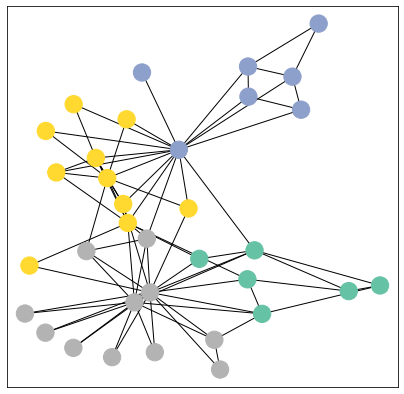

In [16]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## 实现 GNN

搞懂了 PyG 的数据句柄之后，是时候实现第一个 GNN 辣！

为了实现GNN，我们将首先使用最简单的 GNN 操作, **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)).

PyG 通过 [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv)实现 **GCN layer**, 可其可过传入节点特征表示 `x`和 COO 图连接表示 `edge_index`来执行。

有了它，我们就可以准备通过在一个 `torch.nn.Module` 类中定义网络架构，来创建第一个 GNN 辣 ~


In [17]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


在这里，我们首先在 `__init__` 中初始化我们的所有构建块，并在 `forward` 中定义我们网络的计算流程。
我们首先定义并堆叠**三个图卷积层**，这对应于聚合每个节点周围的 3 跳邻域信息（接收最多 3“跳（hops）”远的所有节点）。

此外，`GCNonv` 层将节点特征维度降低到 $2$，即，$34 \rightarrow 4 \rightarrow 4 \rightarrow 2$。 每个 `GCNConv` 层都由一个 [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh) 增强非线性.

之后我们使用一个线性变换 ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)) 作为分类器将我们的节点映射到 4 个类/社区中的 1 个.

我们返回最终分类器的输出以及 GNN 生成的最终节点嵌入。
我们继续通过 `GCN()` 初始化我们的最终模型，打印我们的模型会生成所有使用的子模块的摘要。



Embedding shape: [34, 2]


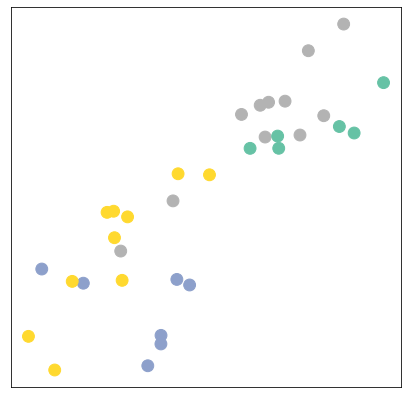

In [18]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

值得注意的是，即使在训练我们模型的权重之前，该模型也会生成与图的社区结构非常相似的节点嵌入。
相同颜色的节点（社区）已经在嵌入空间中紧密聚集在一起，尽管我们模型的权重是**完全随机**初始化的，到目前为止我们还没有进行任何训练！
这得出的结论是 GNN 引入了强烈的归纳偏差（inductive bias），导致输入图中彼此靠近的节点具有相似的嵌入。

### 在跆拳道俱乐部网络上训练

但我们能做得更好吗？ 让我们看一个示例，说明如何根据图中 4 个节点的社区分配知识（即每个社区分配一个已知节点）来训练我们的网络参数：

由于我们模型中的所有内容都是可微分和参数化的，我们可以添加一些标签、训练模型并观察嵌入的反应。
在这里，我们使用半监督或转导学习（transductive learning）程序：我们只是针对每个类的一个节点进行训练，但允许使用完整的输入图数据。

训练模型和训练其他 Pytorch 模型非常相似。
此外，我们还需要定义一个 loss criterion（这里使用, [`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)）并且初始化一个随机梯度 optimizer（这里使用[`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)）。

之后，我们执行多轮优化，其中每一轮包括前向/反向传播，以计算对应模型参数的梯度。
即使您不熟悉 PyTorch，您也应该对这个方案很熟悉。
此外, PyTorch 的文档也提供了[一个如何训练 Pytorch 神经网络的 introduction](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer).


注意我们的半监督学习场景是通过以下行实现的:
```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```
尽管我们计算所有节点的嵌入，但是我们**只使用训练节点来计算损失**.
这是通过过滤分类器输出 `out` 和 ground-truth 标签 `data.y` 以只包含 `train_mask` 中的节点.

现在让我们开始训练，看看我们的节点嵌入如何随时间演变（最好通过显式运行代码体验）：


<IPython.core.display.Javascript object>

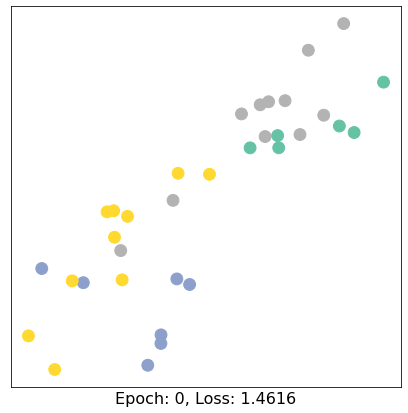

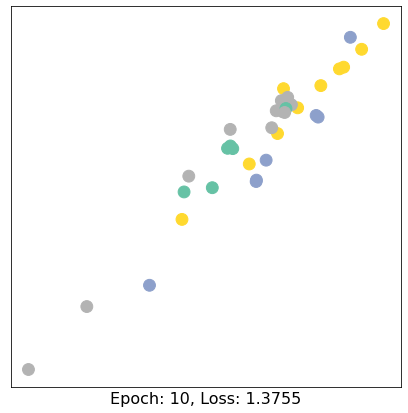

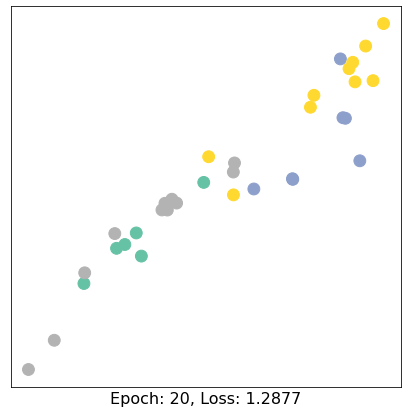

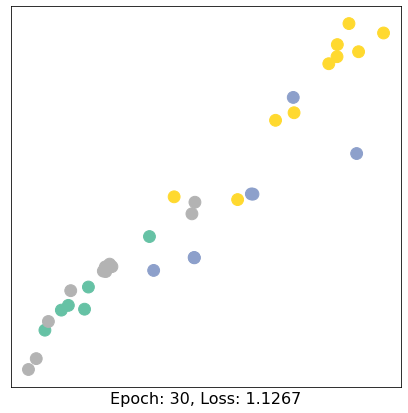

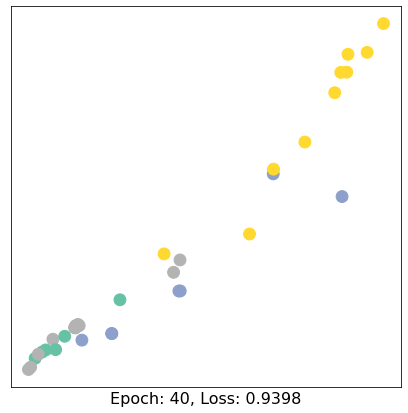

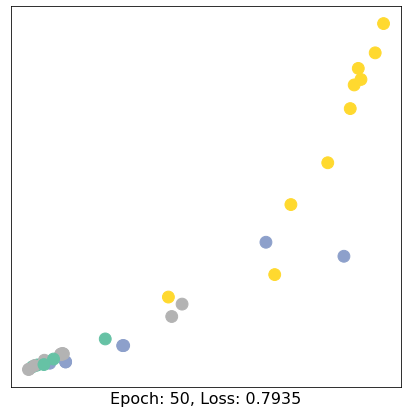

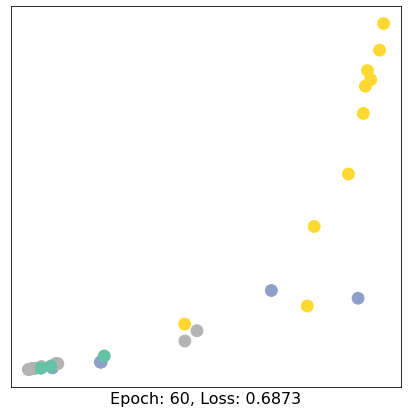

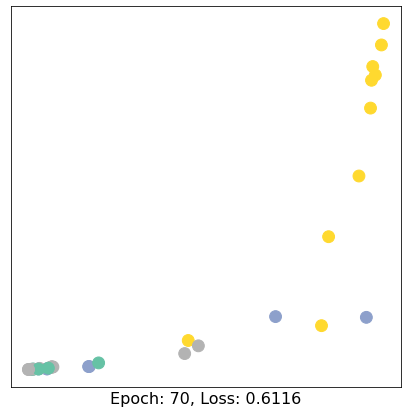

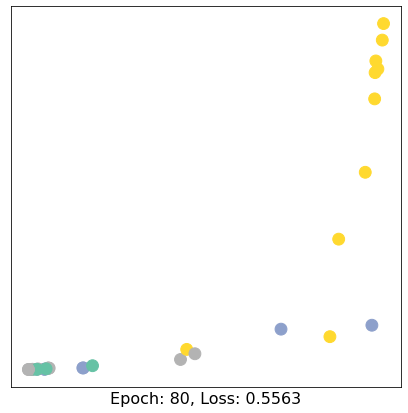

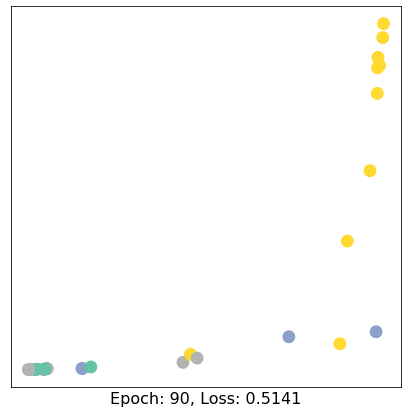

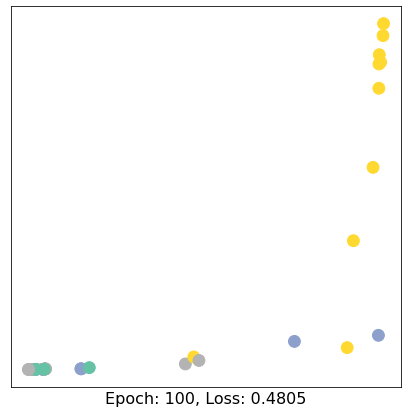

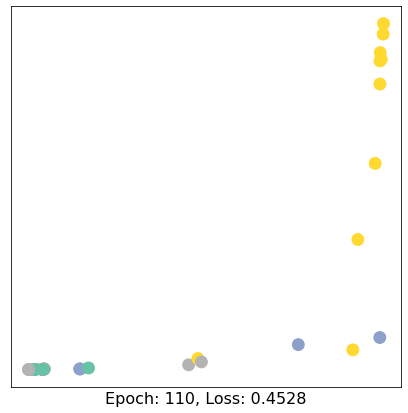

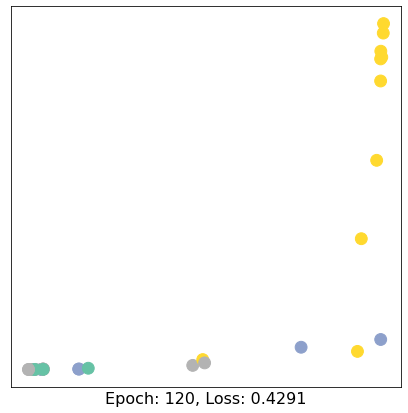

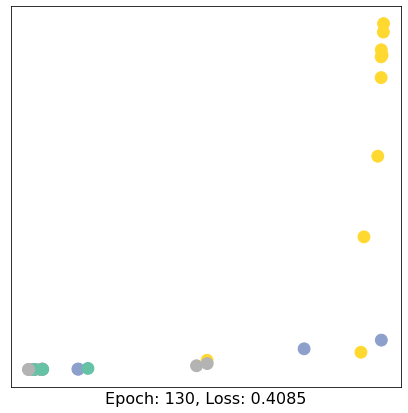

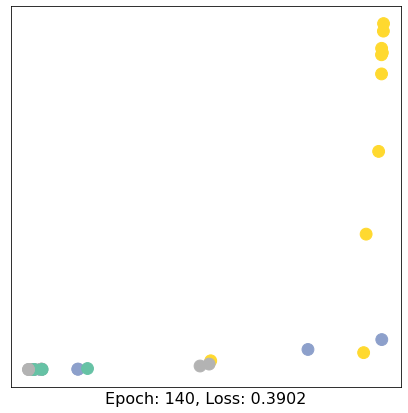

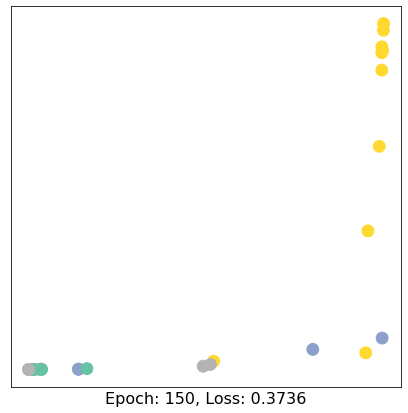

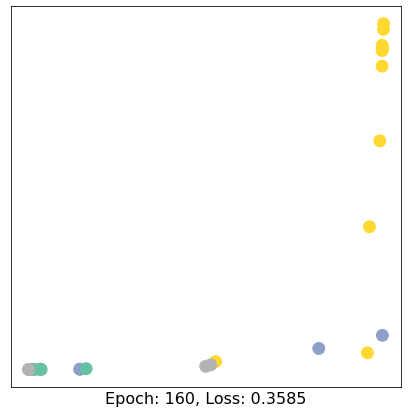

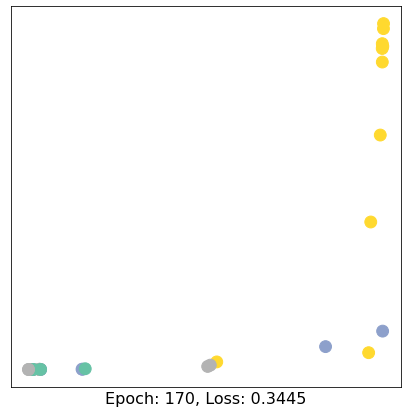

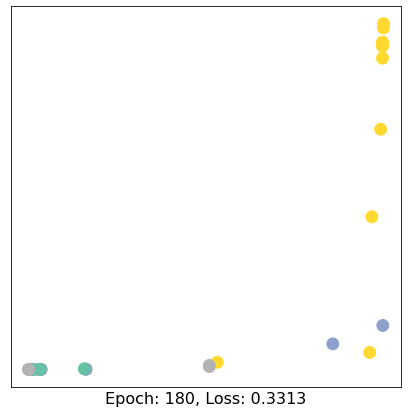

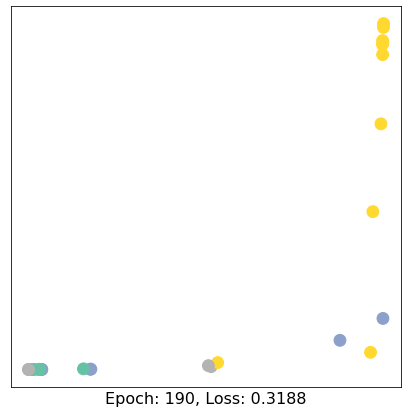

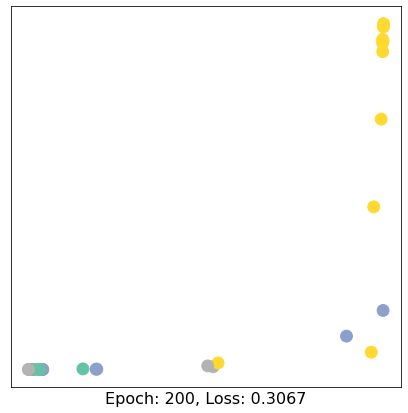

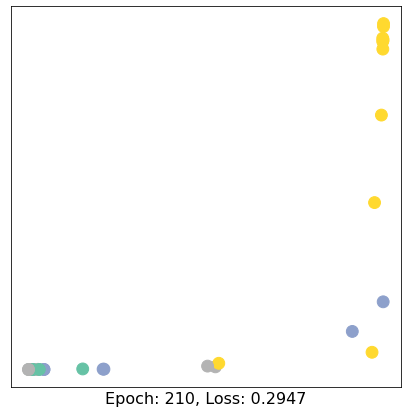

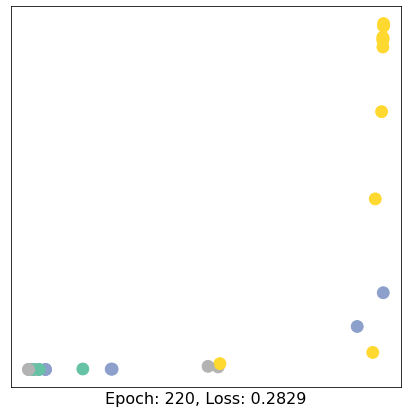

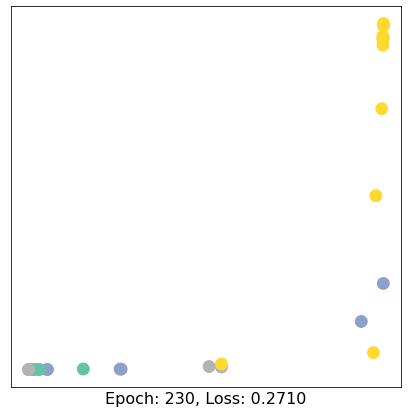

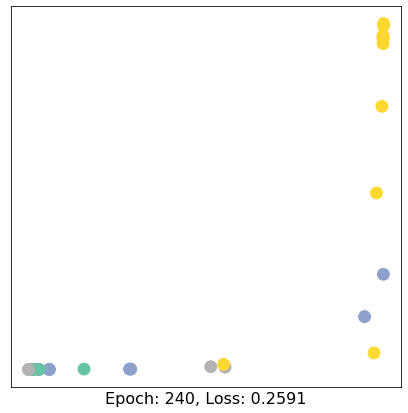

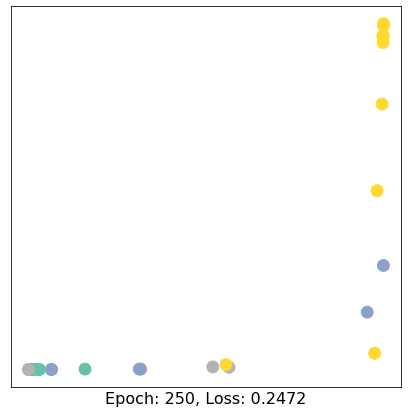

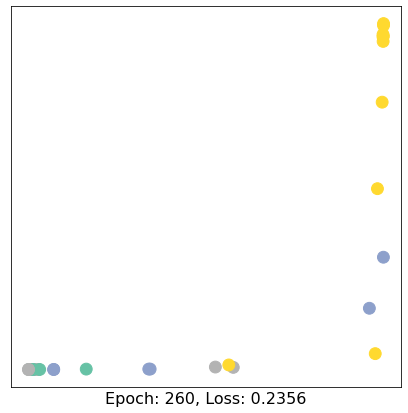

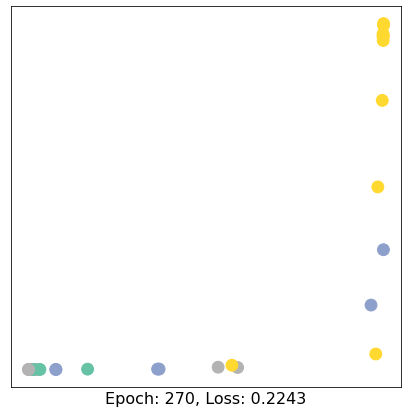

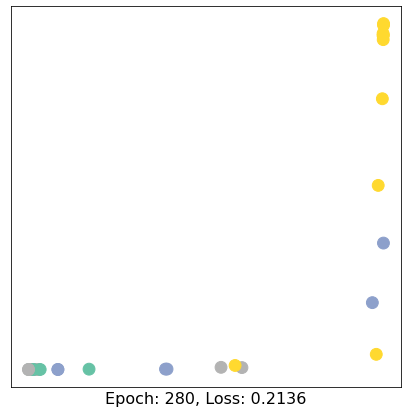

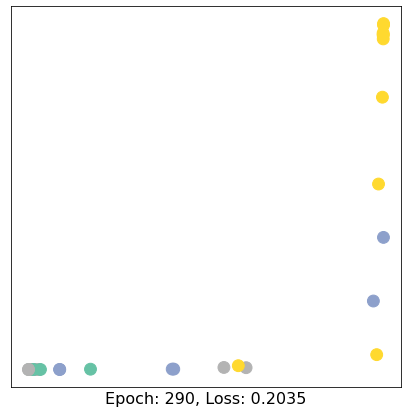

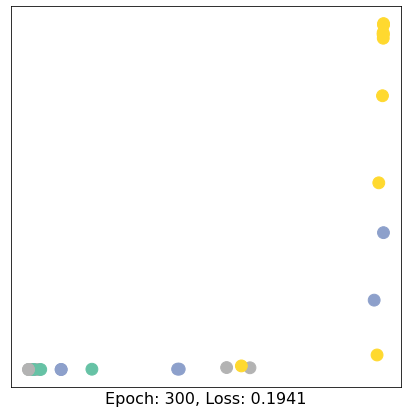

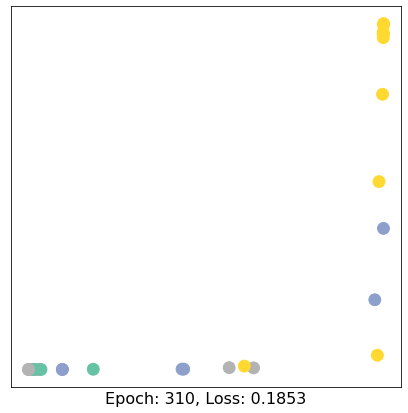

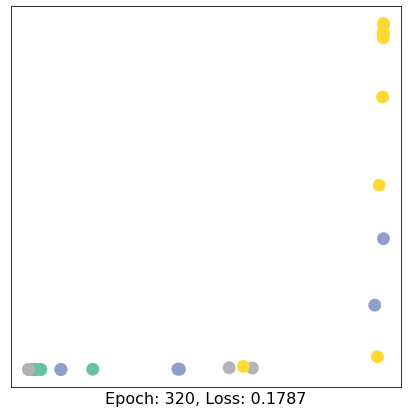

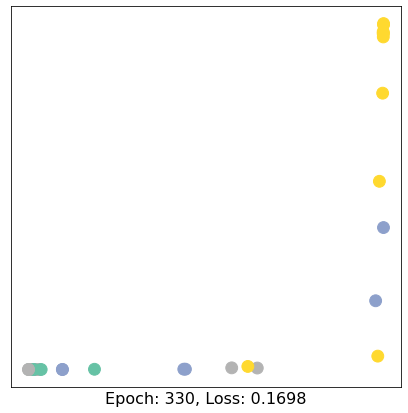

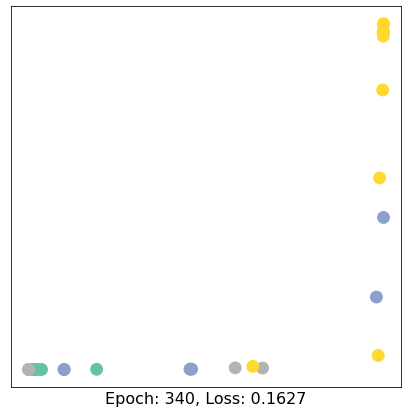

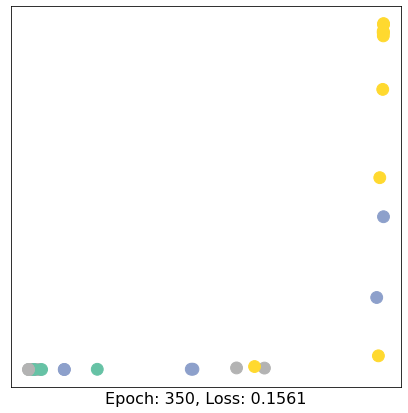

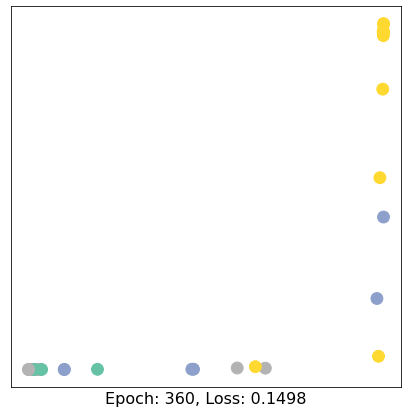

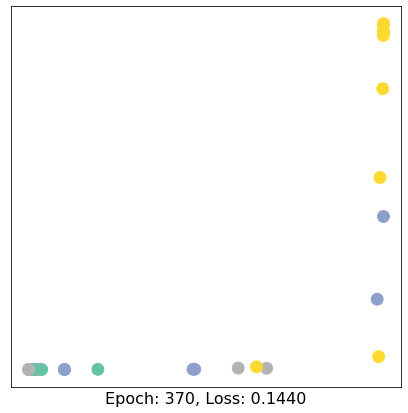

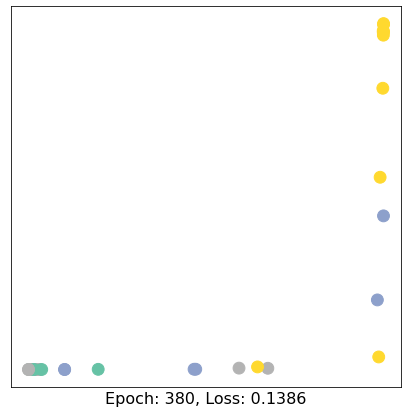

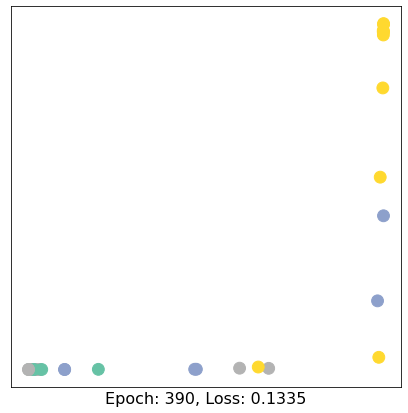

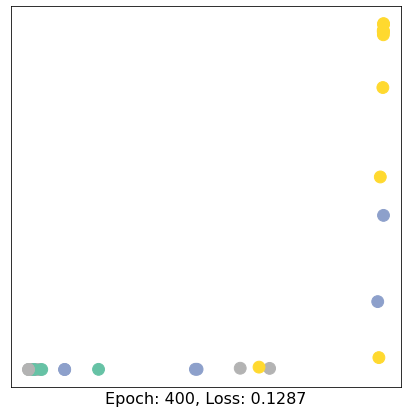

In [19]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

如您所见，我们的 3 层 GCN 模型设法线性分离社区并正确分类大多数节点。

此外，我们用几行代码完成了这一切，这要归功于 PyTorch Geometric 库，它帮助我们完成了数据处理和 GNN 实现。


## 文档
你可以通过 PyG 的[文档](https://pytorch-geometric.readthedocs.io/en/latest/)探索更多的函数~